In [12]:
# Import packages
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from collections import Counter
from parse import preprocess

In [13]:
# Function to show classification report for Cross Validation
def classification_report_with_accuracy_score(y_true, y_pred):
    print(classification_report(y_true, y_pred)) # print classification report
    return accuracy_score(y_true, y_pred) # return accuracy score

In [14]:
# Pre-parse the dataset
data = preprocess("rawfile_blood.csv")


####################################################################
Number of Rows of Dataframe:
1123
Number of Columns of Dataframe:
59

####################################################################
Threshold for number of NULLs in a column: 0.1095
Number of Columns before Parsing for Too Many NULLs in a column:
59
Number of Columns after Parsing for Too Many NULLs in a column:
51

Columns Removed:
B1_b5
B4_a1
B4_a3
B4_a4
B4_a6
B4_b1
B4_b3
B5_a1

####################################################################
Number of Rows before Parsing NULLs in data:
1123
Number of Rows after Parsing NULLs in data:
1007

####################################################################
Number of Columns after dropping A1_2, B1_b4, B2_c3, B4_b2 for inconsistent data types:
47


In [15]:
# Test the undersampling ratio to find best accuracy for Random Forest Classifier
# Define undersample strategy

val = 339

x_axis = []
y_axis1 = []
y_axis2 = []

while (val > 9):
    c = data['condition'].value_counts()
    condition = c.index
    
    for i in range(len(condition)):
        data['condition'].replace(condition[i], i, inplace = True)
    
    y = data['condition']
    
    features = ['A1_1', 'A2_1', 'A3_1', 'B1_a', 'B1_a1', 'B1_a2',
       'B1_a3', 'B1_a4', 'B1_a5', 'B1_a6', 'B1_b', 'B1_b1', 'B1_b2', 'B1_b3',
       'B1_c', 'B1_d', 'B2_a1', 'B2_a2', 'B2_a3', 'B2_a4', 'B2_a5', 'B2_b1',
       'B2_b2', 'B2_b3', 'B2_c1', 'B2_c2', 'B2_c4', 'B2_c5', 'B2_c6', 'B2_c7',
       'B2_d1', 'B2_d2', 'B2_d3', 'B2_d4', 'B2_d5', 'B2_d6', 'B2_d7', 'B2_d8',
       'B2_d9', 'B3', 'B4_a2', 'B4_a5', 'B5_a2', 'B5_a3', 'B6']
    
    X_old = data[features]
    
    X = X_old

    if (val < 77):
        sampling_strategy = {0: val, 1: val, 2: val, 3: val, 4: val, 5: 7}
    elif (val < 134):
        sampling_strategy = {0: val, 1: val, 2: val, 3: val, 4: 76, 5: 7}
    elif (val < 222):
        sampling_strategy = {0: val, 1: val, 2: val, 3: 133, 4: 76, 5: 7}
    elif (val < 232):
        sampling_strategy = {0: val, 1: val, 2: 221, 3: 133, 4: 76, 5: 7}
    elif (val < 340):
        sampling_strategy = {0: val, 1: 231, 2: 221, 3: 133, 4: 76, 5: 7}
    
    undersample = RandomUnderSampler(sampling_strategy=sampling_strategy)

    X, y = undersample.fit_resample(X, y)
    
    # Transform the dataset using SMOTE
    oversample = SMOTE()
    X, y = oversample.fit_resample(X, y)
    
    # Random Forest Classifier
    rfc_model = RandomForestClassifier()
    rfc_model.fit(X, y)
    scores = cross_val_score(rfc_model, X, y, cv=10)
    print("==> Majority Class Samples:", val)
    print("Random Forest Classifier: %0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
    
    # Append into lists to plot graph
    x_axis.append(val)
    y_axis1.append(scores.mean())
    y_axis2.append(scores.std())
    
    val -= 1

==> Majority Class Samples: 339
Random Forest Classifier: 0.76 accuracy with a standard deviation of 0.08
==> Majority Class Samples: 338
Random Forest Classifier: 0.78 accuracy with a standard deviation of 0.08
==> Majority Class Samples: 337
Random Forest Classifier: 0.77 accuracy with a standard deviation of 0.08
==> Majority Class Samples: 336
Random Forest Classifier: 0.76 accuracy with a standard deviation of 0.08
==> Majority Class Samples: 335
Random Forest Classifier: 0.76 accuracy with a standard deviation of 0.08
==> Majority Class Samples: 334
Random Forest Classifier: 0.76 accuracy with a standard deviation of 0.07
==> Majority Class Samples: 333
Random Forest Classifier: 0.77 accuracy with a standard deviation of 0.08
==> Majority Class Samples: 332
Random Forest Classifier: 0.77 accuracy with a standard deviation of 0.07
==> Majority Class Samples: 331
Random Forest Classifier: 0.75 accuracy with a standard deviation of 0.08
==> Majority Class Samples: 330
Random Forest 

==> Majority Class Samples: 261
Random Forest Classifier: 0.68 accuracy with a standard deviation of 0.10
==> Majority Class Samples: 260
Random Forest Classifier: 0.66 accuracy with a standard deviation of 0.08
==> Majority Class Samples: 259
Random Forest Classifier: 0.66 accuracy with a standard deviation of 0.09
==> Majority Class Samples: 258
Random Forest Classifier: 0.66 accuracy with a standard deviation of 0.08
==> Majority Class Samples: 257
Random Forest Classifier: 0.65 accuracy with a standard deviation of 0.08
==> Majority Class Samples: 256
Random Forest Classifier: 0.67 accuracy with a standard deviation of 0.08
==> Majority Class Samples: 255
Random Forest Classifier: 0.63 accuracy with a standard deviation of 0.08
==> Majority Class Samples: 254
Random Forest Classifier: 0.65 accuracy with a standard deviation of 0.08
==> Majority Class Samples: 253
Random Forest Classifier: 0.66 accuracy with a standard deviation of 0.06
==> Majority Class Samples: 252
Random Forest 

==> Majority Class Samples: 183
Random Forest Classifier: 0.57 accuracy with a standard deviation of 0.07
==> Majority Class Samples: 182
Random Forest Classifier: 0.55 accuracy with a standard deviation of 0.05
==> Majority Class Samples: 181
Random Forest Classifier: 0.56 accuracy with a standard deviation of 0.05
==> Majority Class Samples: 180
Random Forest Classifier: 0.54 accuracy with a standard deviation of 0.06
==> Majority Class Samples: 179
Random Forest Classifier: 0.55 accuracy with a standard deviation of 0.06
==> Majority Class Samples: 178
Random Forest Classifier: 0.56 accuracy with a standard deviation of 0.04
==> Majority Class Samples: 177
Random Forest Classifier: 0.55 accuracy with a standard deviation of 0.08
==> Majority Class Samples: 176
Random Forest Classifier: 0.56 accuracy with a standard deviation of 0.07
==> Majority Class Samples: 175
Random Forest Classifier: 0.53 accuracy with a standard deviation of 0.06
==> Majority Class Samples: 174
Random Forest 

==> Majority Class Samples: 105
Random Forest Classifier: 0.42 accuracy with a standard deviation of 0.05
==> Majority Class Samples: 104
Random Forest Classifier: 0.43 accuracy with a standard deviation of 0.06
==> Majority Class Samples: 103
Random Forest Classifier: 0.45 accuracy with a standard deviation of 0.04
==> Majority Class Samples: 102
Random Forest Classifier: 0.43 accuracy with a standard deviation of 0.03
==> Majority Class Samples: 101
Random Forest Classifier: 0.47 accuracy with a standard deviation of 0.04
==> Majority Class Samples: 100
Random Forest Classifier: 0.45 accuracy with a standard deviation of 0.08
==> Majority Class Samples: 99
Random Forest Classifier: 0.43 accuracy with a standard deviation of 0.05
==> Majority Class Samples: 98
Random Forest Classifier: 0.43 accuracy with a standard deviation of 0.04
==> Majority Class Samples: 97
Random Forest Classifier: 0.41 accuracy with a standard deviation of 0.07
==> Majority Class Samples: 96
Random Forest Clas

==> Majority Class Samples: 27
Random Forest Classifier: 0.38 accuracy with a standard deviation of 0.09
==> Majority Class Samples: 26
Random Forest Classifier: 0.38 accuracy with a standard deviation of 0.11
==> Majority Class Samples: 25
Random Forest Classifier: 0.33 accuracy with a standard deviation of 0.09
==> Majority Class Samples: 24
Random Forest Classifier: 0.42 accuracy with a standard deviation of 0.13
==> Majority Class Samples: 23
Random Forest Classifier: 0.35 accuracy with a standard deviation of 0.09
==> Majority Class Samples: 22
Random Forest Classifier: 0.29 accuracy with a standard deviation of 0.09
==> Majority Class Samples: 21
Random Forest Classifier: 0.36 accuracy with a standard deviation of 0.12
==> Majority Class Samples: 20
Random Forest Classifier: 0.29 accuracy with a standard deviation of 0.09
==> Majority Class Samples: 19
Random Forest Classifier: 0.32 accuracy with a standard deviation of 0.12
==> Majority Class Samples: 18
Random Forest Classifier

Text(0.5, 1.0, 'RFC CV Accuracy vs Majority Class Samples')

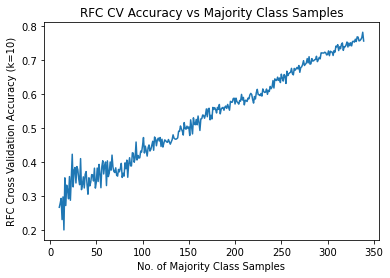

In [16]:
import matplotlib.pyplot as plt

plt.plot(x_axis, y_axis1)
plt.xlabel("No. of Majority Class Samples")
plt.ylabel("RFC Cross Validation Accuracy (k=10)")
plt.title("RFC CV Accuracy vs Majority Class Samples")

Text(0.5, 1.0, 'RFC CV Std Dv vs Majority Class Samples')

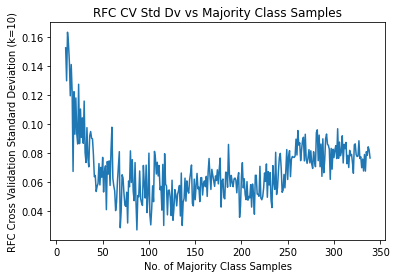

In [17]:
plt.plot(x_axis, y_axis2)
plt.xlabel("No. of Majority Class Samples")
plt.ylabel("RFC Cross Validation Standard Deviation (k=10)")
plt.title("RFC CV Std Dv vs Majority Class Samples")

In [19]:
# Test the undersampling ratio to find best accuracy (using Holdout Method) for Random Forest Classifier
# Define undersample strategy

val = 339

x_axis = []
y_axis = []

while (val > 9):
    c = data['condition'].value_counts()
    condition = c.index
    
    for i in range(len(condition)):
        data['condition'].replace(condition[i], i, inplace = True)
    
    y = data['condition']
    
    features = ['A1_1', 'A2_1', 'A3_1', 'B1_a', 'B1_a1', 'B1_a2',
       'B1_a3', 'B1_a4', 'B1_a5', 'B1_a6', 'B1_b', 'B1_b1', 'B1_b2', 'B1_b3',
       'B1_c', 'B1_d', 'B2_a1', 'B2_a2', 'B2_a3', 'B2_a4', 'B2_a5', 'B2_b1',
       'B2_b2', 'B2_b3', 'B2_c1', 'B2_c2', 'B2_c4', 'B2_c5', 'B2_c6', 'B2_c7',
       'B2_d1', 'B2_d2', 'B2_d3', 'B2_d4', 'B2_d5', 'B2_d6', 'B2_d7', 'B2_d8',
       'B2_d9', 'B3', 'B4_a2', 'B4_a5', 'B5_a2', 'B5_a3', 'B6']
    
    X_old = data[features]
    
    X = X_old

    if (val < 77):
        sampling_strategy = {0: val, 1: val, 2: val, 3: val, 4: val, 5: 7}
    elif (val < 134):
        sampling_strategy = {0: val, 1: val, 2: val, 3: val, 4: 76, 5: 7}
    elif (val < 222):
        sampling_strategy = {0: val, 1: val, 2: val, 3: 133, 4: 76, 5: 7}
    elif (val < 232):
        sampling_strategy = {0: val, 1: val, 2: 221, 3: 133, 4: 76, 5: 7}
    elif (val < 340):
        sampling_strategy = {0: val, 1: 231, 2: 221, 3: 133, 4: 76, 5: 7}
    
    undersample = RandomUnderSampler(sampling_strategy=sampling_strategy)

    X, y = undersample.fit_resample(X, y)
    
    # Transform the dataset using SMOTE
    oversample = SMOTE()
    X, y = oversample.fit_resample(X, y)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
    
   # Random Forest Classifier
    rfc_model = RandomForestClassifier()
    rfc_model.fit(X_train, y_train)
    print("==> Majority Class Samples:", val)
    print("Random Forest Classifier:", rfc_model.score(X_test, y_test).round(3))
    
    # Append into lists to plot graph
    x_axis.append(val)
    y_axis.append(rfc_model.score(X_test, y_test).round(3))
    
    val -= 1

==> Majority Class Samples: 339
Random Forest Classifier: 0.752
==> Majority Class Samples: 338
Random Forest Classifier: 0.773
==> Majority Class Samples: 337
Random Forest Classifier: 0.753
==> Majority Class Samples: 336
Random Forest Classifier: 0.748
==> Majority Class Samples: 335
Random Forest Classifier: 0.726
==> Majority Class Samples: 334
Random Forest Classifier: 0.781
==> Majority Class Samples: 333
Random Forest Classifier: 0.698
==> Majority Class Samples: 332
Random Forest Classifier: 0.752
==> Majority Class Samples: 331
Random Forest Classifier: 0.764
==> Majority Class Samples: 330
Random Forest Classifier: 0.75
==> Majority Class Samples: 329
Random Forest Classifier: 0.722
==> Majority Class Samples: 328
Random Forest Classifier: 0.726
==> Majority Class Samples: 327
Random Forest Classifier: 0.768
==> Majority Class Samples: 326
Random Forest Classifier: 0.714
==> Majority Class Samples: 325
Random Forest Classifier: 0.695
==> Majority Class Samples: 324
Random Fo

==> Majority Class Samples: 210
Random Forest Classifier: 0.611
==> Majority Class Samples: 209
Random Forest Classifier: 0.546
==> Majority Class Samples: 208
Random Forest Classifier: 0.536
==> Majority Class Samples: 207
Random Forest Classifier: 0.594
==> Majority Class Samples: 206
Random Forest Classifier: 0.56
==> Majority Class Samples: 205
Random Forest Classifier: 0.545
==> Majority Class Samples: 204
Random Forest Classifier: 0.571
==> Majority Class Samples: 203
Random Forest Classifier: 0.496
==> Majority Class Samples: 202
Random Forest Classifier: 0.56
==> Majority Class Samples: 201
Random Forest Classifier: 0.579
==> Majority Class Samples: 200
Random Forest Classifier: 0.55
==> Majority Class Samples: 199
Random Forest Classifier: 0.582
==> Majority Class Samples: 198
Random Forest Classifier: 0.521
==> Majority Class Samples: 197
Random Forest Classifier: 0.549
==> Majority Class Samples: 196
Random Forest Classifier: 0.525
==> Majority Class Samples: 195
Random Fore

==> Majority Class Samples: 81
Random Forest Classifier: 0.398
==> Majority Class Samples: 80
Random Forest Classifier: 0.427
==> Majority Class Samples: 79
Random Forest Classifier: 0.4
==> Majority Class Samples: 78
Random Forest Classifier: 0.404
==> Majority Class Samples: 77
Random Forest Classifier: 0.366
==> Majority Class Samples: 76
Random Forest Classifier: 0.391
==> Majority Class Samples: 75
Random Forest Classifier: 0.422
==> Majority Class Samples: 74
Random Forest Classifier: 0.348
==> Majority Class Samples: 73
Random Forest Classifier: 0.352
==> Majority Class Samples: 72
Random Forest Classifier: 0.299
==> Majority Class Samples: 71
Random Forest Classifier: 0.395
==> Majority Class Samples: 70
Random Forest Classifier: 0.405
==> Majority Class Samples: 69
Random Forest Classifier: 0.458
==> Majority Class Samples: 68
Random Forest Classifier: 0.415
==> Majority Class Samples: 67
Random Forest Classifier: 0.346
==> Majority Class Samples: 66
Random Forest Classifier: 

Text(0.5, 1.0, 'RFC Holdout Accuracy vs Majority Class Samples')

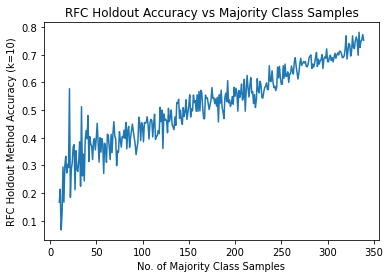

In [20]:
plt.plot(x_axis, y_axis)
plt.xlabel("No. of Majority Class Samples")
plt.ylabel("RFC Holdout Method Accuracy (k=10)")
plt.title("RFC Holdout Accuracy vs Majority Class Samples")